# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.314338e+01     1.555721e+01
 * time: 0.004910945892333984
     1     6.353825e+01     1.009792e+01
 * time: 0.015069961547851562
     2     5.737054e+01     1.503127e+01
 * time: 0.03903007507324219
     3     4.283134e+01     1.101316e+01
 * time: 0.07177996635437012
     4     3.476140e+01     1.019578e+01
 * time: 0.10190391540527344
     5     1.452766e+01     3.436798e+00
 * time: 0.13348793983459473
     6     1.129259e+01     3.788333e+00
 * time: 0.1556529998779297
     7     9.263188e+00     2.457062e+00
 * time: 0.17794489860534668
     8     8.931202e+00     6.690667e+00
 * time: 0.29886889457702637
     9     8.050414e+00     4.194300e+00
 * time: 0.3234090805053711
    10     7.505518e+00     5.416826e+00
 * time: 0.3457629680633545
    11     6.813981e+00     3.174208e+00
 * time: 0.3648700714111328
    12     6.299201e+00     2.416582e+00
 * time: 0.38374805450439453
    13     6.074233e+00     2.425292e+00
 * time: 0

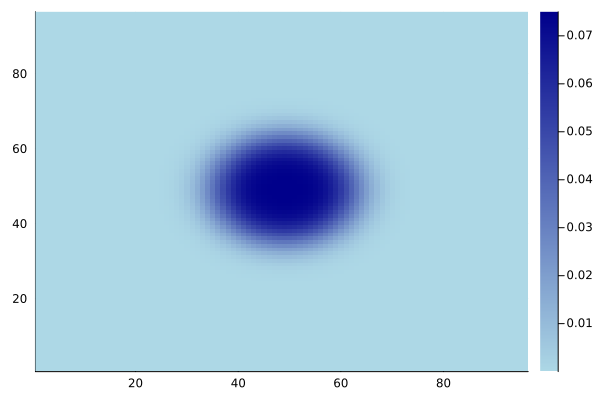

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)